# <span style="color:blue"> 이토록 쉬운 통계 & R </span>

<img src="../image/cover.png" width="200" height="400" align="left">  임경덕 지음

## PART 4 데이터 분석 도구, R

## 95% R로 분석 다시보기-2-treat-4-선형대수기초 대응분석관련-4 (44일차)

   * 데이타프로젝트 (http://dataproject.xyz) 또는 (http://cafe.naver.com/dataartproject) 에 미리 저장된 스크립트를 다운 받을 수 있습니다.
   * 스크립트를 활용하면 직접 명령어를 입력하지 않고 저장된 명령어들을 실행할 수 있습니다.

### 데이터 파일은 dataartproject.xyz 에 있습니다.

# 두개의 범주형 변수의 관계 찾기 -- treat - 대응분석 정리

## 진료과목 중 내과만 자세히 살피기  -- 대응분석

## 대응분석 관련 정리 계속

대응분석을 설명하기 위해서는 몇가지 기본적인 내용의 정리가 필요합니다. 따라서 관련 내용을 먼저 정리 하고 진료 과목에 대한 대응 분석을 설명할 예정입니다.
여기서 대응분석이라는 것은 일반적으로 두개의 범주형 변수의 관계에 대한 독립성 여부는 카이제곱 분석에 의하여 P 검정을 살펴보게 됩니다.

그러나 다수준인 경우에는 분석시에 복잡한 양상을 띄게 됩니다. 따라서 이 경우에는 수준별 대응 분석을 하게 됩니다. 대응분석은 범주형 변수의 각 수준을 계량화하여 2차원 그래프 상에서 표현하여 두 범주형 변수가 변화는 관계를 살펴보는 것입니다.

이런 내용을 이해 하기 위해서는 선형 대수와 관련 해서 몇가지 기초적인 지식이 필요합니다.

####  예제들과 관련한 정리 (http://darkpgmr.tistory.com/105)
지금까지는 내용을 예제로서만 설명을 하여 따라갔지만, 그 이유에 대해서 간략하게 설명하고, 다음 SVD 관련 정리합니다.

마코프체인 부터 진행합니다.


#### 마코프체인 의 안정상태 조건

복습을 위해서 애플과 삼성의 마켓 쉐어 관련 전이 상태를 그려보면 다음과 같습니다.

* $$
\text{<월별 애플/삼성 휴대폰 마켓 쉐어 확률>} \\
\begin{array}{|c|l|c|}
\hline
\text{이번달 \ 다음달} & \text{애플} & \text{삼성} \\
\hline
\text{애플} & 0.714 & 0.286 \\
\text{삼성} & 0.363 & 0.637 \\
\hline
\end{array}
$$

이번달 마켓쉐어 : 애플 0.492, 삼성 0.508


* 상태전이도

In [27]:
# 라이브러리 설정
library(Matrix)
library(expm)
library(markovchain)
library(diagram)
library(pracma)


In [2]:
stateNames = c("Apple", "Samsung")
Mtr = matrix(c(.714,.286,.363,.637), nrow = 2, byrow=TRUE)
rownames(Mtr) = stateNames
colnames(Mtr) = stateNames
round(Mtr, 3)

Market = c(0.492, 0.508)
round(Market, 3)

,Apple,Samsung
Apple,0.714,0.286
Samsung,0.363,0.637


[1] 0.492 0.508

* 이번달 휴대폰 마켓쉐어 애플이 49.2% 이고, 삼성이 50.8% 입니다. 
* 애플사용자가 다시 애플을 구매하는 경우 는 71.4% 이고 삼성으로 바꾸는 경우는 28.6% 입니다.
* 삼성 사용자가 애플로 바꾸는 경우는 36.4% 이고, 삼성사용자가 다시 삼성으로 사용하는 경우는 63.7 % 입니다.

이것을 상태전이도를 그려보면 다음과 같습니다.

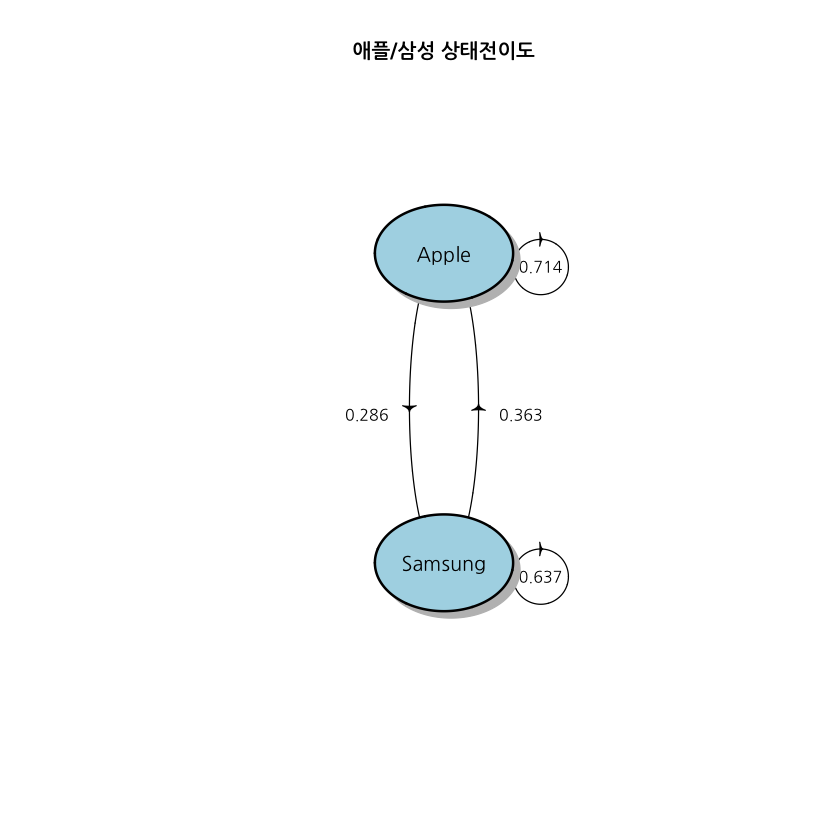

In [35]:
par(family="NanumGothic")  # 한글 폰트 설정
options(warn=-1)  # 워닝 disable

plotmat(t(Mtr),pos = c(1, 1),
        lwd = 1, box.lwd = 2,
        cex.txt = 0.8,
        box.size = 0.1,
        box.type = "ellipse",
        box.prop = .7,
        box.col = "light blue",
        arr.length=.1,
        arr.width=.2,
        self.cex = .4,
        self.shifty = -.02,
        self.shiftx = .14,
        main = "애플/삼성 상태전이도")
options(warn=0)

In [4]:
# 이번달 마켓 쉐어가 애플, 삼성 각각 다음과 같습니다. 3달후에 예측되는 마켓쉐어는 
round(Market, 3)
Mtr3 = Mtr%^%3
round(Mtr, 3)
round(Mtr3,3)

[1] 0.492 0.508

,Apple,Samsung
Apple,0.714,0.286
Samsung,0.363,0.637


,Apple,Samsung
Apple,0.578,0.422
Samsung,0.535,0.465


In [5]:
#3달후에 마켓쉐어는 애플이 49.2% 에서 55.8% 로 삼성은 50.8% 에서 44.4% 로 바뀝니다.
round(Market %*% Mtr3,3)

Apple,Samsung
0.556,0.444


### 안정(정상) 상태조건

* 전이확률행렬 또는 전이행렬이 3달후에 마켓은 $Mtr^3$, 4달후에는 $Mtr^4$ 와 같은 형식으로 됩니다.
* 이때 전이확률이 거듭제곱의 형태로 계속 진행하다보면 더이상 전이행렬이 변하지 않는 일정한 값을 갖게 됩니다.
* 애플/삼성의 경우로 살펴보면 다음곽 같습니다.

In [6]:
'P^1'
round(Mtr %^% 1, 3)
'P^5'
round(Mtr %^% 5, 3)
'P^6'
round(Mtr %^% 6, 3)
'P^7'
round(Mtr %^% 7, 3)
'P^8'
round(Mtr %^% 8, 3)
'P^10'
round(Mtr %^% 10, 3)

[1] "P^1"

,Apple,Samsung
Apple,0.714,0.286
Samsung,0.363,0.637


[1] "P^5"

,Apple,Samsung
Apple,0.562,0.438
Samsung,0.556,0.444


[1] "P^6"

,Apple,Samsung
Apple,0.560,0.440
Samsung,0.558,0.442


[1] "P^7"

,Apple,Samsung
Apple,0.560,0.440
Samsung,0.559,0.441


[1] "P^8"

,Apple,Samsung
Apple,0.559,0.441
Samsung,0.559,0.441


[1] "P^10"

,Apple,Samsung
Apple,0.559,0.441
Samsung,0.559,0.441


* 전이 행렬이 $P^8$ 부터 전이행렬 이 일정하게 변하지 않고 있습니다. 즉 8개월째 부터는 애플/삼성 마켓 쉐어 전이 확률이 일정하게 됩니다. 이런 상태를 마코프 체인의 안전(정상)상태라고 할 수 있습니다.

* 정상상태가 되었을 경우 $\mathbf P \mathbf u_{k-1} = \lambda \mathbf u_k$ 가 되어야 하고, 여기서 $\mathbf P$ 는 전이행렬, $\mathbf u_k$ 는  k 월의 마켓쉐어라고 하면..  전이행렬이 안전상태이면 $\mathbf P$ 는 변하지 않으므로 $\mathbf u_{l-1} = \mathbf u_k$ 가 됩니다. 
* 초기 마켓쉐어 상태 $\mathbf u_1$ 과 전이행렬을 알고 있다면 k 월 후에 마켓쉐어는 
* $\mathbf P \mathbf u_{k_1} = \lambda \mathbf u_k$ 이므로 이것을 점화식으로 계속 진행하면
* $\mathbf P^k \mathbf u_1 = \lambda^k \mathbf u_k$ 가 될 것이다. 

* 이 식이 계속 안정적인 상태를 가져야만 한다면
1. 고유값은 반드시 1인 것이 있어야만 합니다. 그렇지 않으면 $\lambda$ 의 지수값은 급격하게 큰값으로 발산하거나 0으로 수렴하게 됩니다.  
2. 발산하지 않으려면 고유값 1을 제외한 나머지 값은 반드시 $|\lambda| \lt 1$ 이 되어야 합니다.  
3. 마코프 각 row 에서 컬럼값을 다 더하면 1이 되어야 합니다. 그렇지 않으면 $\mathbf P^k$ 는 k 가 커지면서 증가하게 됩니다.  
4. 고유값이 1일때 고유벡터의 각 요소별 합은 1이 되어야 합니다.

### 다시 날씨 예제로 돌아가서

In [7]:
stateNames = c("Rain","Nice","Snow")
Oz = matrix(c(.5,.25,.25,.5,0,.5,.25,.25,.5), nrow=3, byrow=TRUE)
rownames(Oz) = stateNames
colnames(Oz) = stateNames

print(stateNames)
print(Oz)

[1] "Rain" "Nice" "Snow"
     Rain Nice Snow
Rain 0.50 0.25 0.25
Nice 0.50 0.00 0.50
Snow 0.25 0.25 0.50


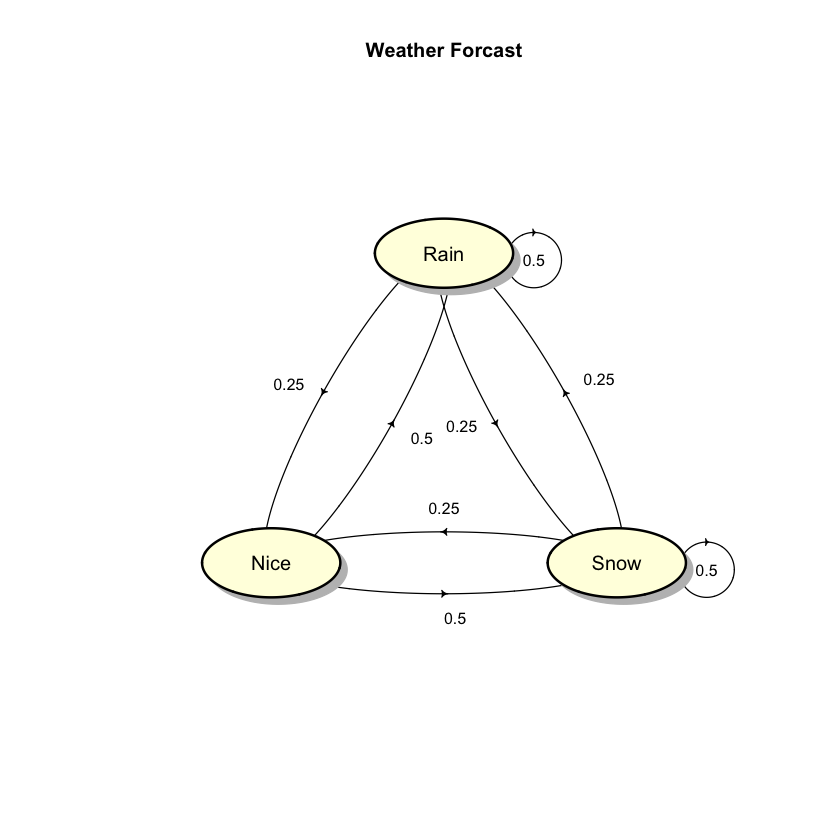

In [36]:
plotmat(t(Oz),pos = c(1,2),
        lwd = 1, box.lwd = 2,
        cex.txt = 0.8,
        box.size = 0.1,
        box.type = "circle",
        box.prop = 0.5,
        box.col = "light yellow",
        arr.length=.1,
        arr.width=.1,
        self.cex = .4,
        self.shifty = -.01,
        self.shiftx = .13,
        main = "Weather Forcast")

In [9]:
# 3일후 일기 예보 전이행렬

Oz3 = Oz %^% 3
round(Oz3,3)

,Rain,Nice,Snow
Rain,0.406,0.203,0.391
Nice,0.406,0.188,0.406
Snow,0.391,0.203,0.406


In [10]:
# 첫날 Weather 확률을 각각 1/3,1/3,1/3 이라고 하면 3일후 weather 확률은??
u = c(1/3, 1/3, 1/3)
'첫날 Weather 확률을 각각 1/3,1/3,1/3 이라고 하면 3일후 weather 확률은??'
round(u %*% Oz3,3)

[1] "첫날 Weather 확률을 각각 1/3,1/3,1/3 이라고 하면 3일후 weather 확률은??"

Rain,Nice,Snow
0.401,0.198,0.401


* stady state (안정상태)를 구하는 방법
 1. Matrix power 에 의하여...  
 2. 고유값이 1 일 경우 고유벡터를 구하는 것에 의하여  
 3. 영공간에 의하여 구하는 방법
 4. markovchain package 에 의한 방법



In [11]:
'방법 1: compute power 에 수렴되는 전이행렬에 의하여 행벡터 구함'
round(Oz %^% 1,3)
round(Oz %^% 2,3)
round(Oz %^% 3,3)
round(Oz %^% 4,3)
round(Oz %^% 5,3)
round(Oz %^% 6,3)
round(Oz %^% 7,3)

[1] "방법 1: compute power 에 수렴되는 전이행렬에 의하여 행벡터 구함"

,Rain,Nice,Snow
Rain,0.50,0.25,0.25
Nice,0.50,0.00,0.50
Snow,0.25,0.25,0.50


,Rain,Nice,Snow
Rain,0.438,0.188,0.375
Nice,0.375,0.250,0.375
Snow,0.375,0.188,0.438


,Rain,Nice,Snow
Rain,0.406,0.203,0.391
Nice,0.406,0.188,0.406
Snow,0.391,0.203,0.406


,Rain,Nice,Snow
Rain,0.402,0.199,0.398
Nice,0.398,0.203,0.398
Snow,0.398,0.199,0.402


,Rain,Nice,Snow
Rain,0.400,0.200,0.399
Nice,0.400,0.199,0.400
Snow,0.399,0.200,0.400


,Rain,Nice,Snow
Rain,0.4,0.2,0.4
Nice,0.4,0.2,0.4
Snow,0.4,0.2,0.4


,Rain,Nice,Snow
Rain,0.4,0.2,0.4
Nice,0.4,0.2,0.4
Snow,0.4,0.2,0.4


In [12]:
'방법2: 고유값 1에 의한 고유벡터 구하기'
eigenOz = eigen(t(Oz))
print(eigenOz)

[1] "방법2: 고유값 1에 의한 고유벡터 구하기"

eigen() decomposition
$values
[1]  1.00  0.25 -0.25

$vectors
           [,1]          [,2]       [,3]
[1,] -0.6666667 -7.071068e-01  0.4082483
[2,] -0.3333333 -1.012404e-16 -0.8164966
[3,] -0.6666667  7.071068e-01  0.4082483



In [13]:
print(sum(eigenOz$vectors[,1]))
print(eigenOz$vectors[,1])
ev = eigenOz$vectors[,1] / sum(eigenOz$vectors[,1])
round(ev, 3)

[1] -1.666667
[1] -0.6666667 -0.3333333 -0.6666667


[1] 0.4 0.2 0.4

In [14]:
'방법 3: (P-I) 의 영공간에 의한 계산'
I = diag(3)
round(I,3)

[1] "방법 3: (P-I) 의 영공간에 의한 계산"

1,0,0
0,1,0
0,0,1


In [15]:
ns = nullspace(t(Oz - I))
ns = round(ns / sum(ns),3)
ns

0.4
0.2
0.4


In [16]:
'방법 4: markovchain package 에 의해서, 많은 자료일 경우 사용'
stateNames = c("Rain","Nice","Snow")
OzMC = new("markovchain",
            states = stateNames,
            transitionMatrix = matrix(c(.5,.25,.25,.5,0,.5,.25,.25,.5), nrow=3, byrow=TRUE, dimnames = list(stateNames,stateNames))
          )

steadyStates(OzMC)

[1] "방법 4: markovchain package 에 의해서, 많은 자료일 경우 사용"

Rain,Nice,Snow
0.4,0.2,0.4


* 방법 4일 경우 steadyStates() 함수는 비교적 큰 마코프 체인 자료에서도 사용이 가능합니다. 다음 코드는 5,000 row, 5,000 column 정규 마코프 를 생성하여 사용합니다.

In [19]:
# Create a large random regular matrix
randReg = function(N){
    M = matrix(runif(N^2,min=1,max=N),nrow=N,ncol=N)
    rowS = rowSums(M)
    regM = M/rowS
    return(regM)
}

#N = 5000
N = 1000
M = randReg(N)
#rowSums(M)

system.time(regMC <- new("markovchain", states = as.character(1:N),
                         transitionMatrix = M,
                         name = "M"))

system.time(ss <- steadyStates(regMC))

   user  system elapsed 
  2.341   0.325   2.673 

   user  system elapsed 
  5.780   0.026   5.817 

* 마코프체인 시뮬레이션시 사용..  위 시물레이션 마코프 체인 궤적을 그래프로 표시합니다. 

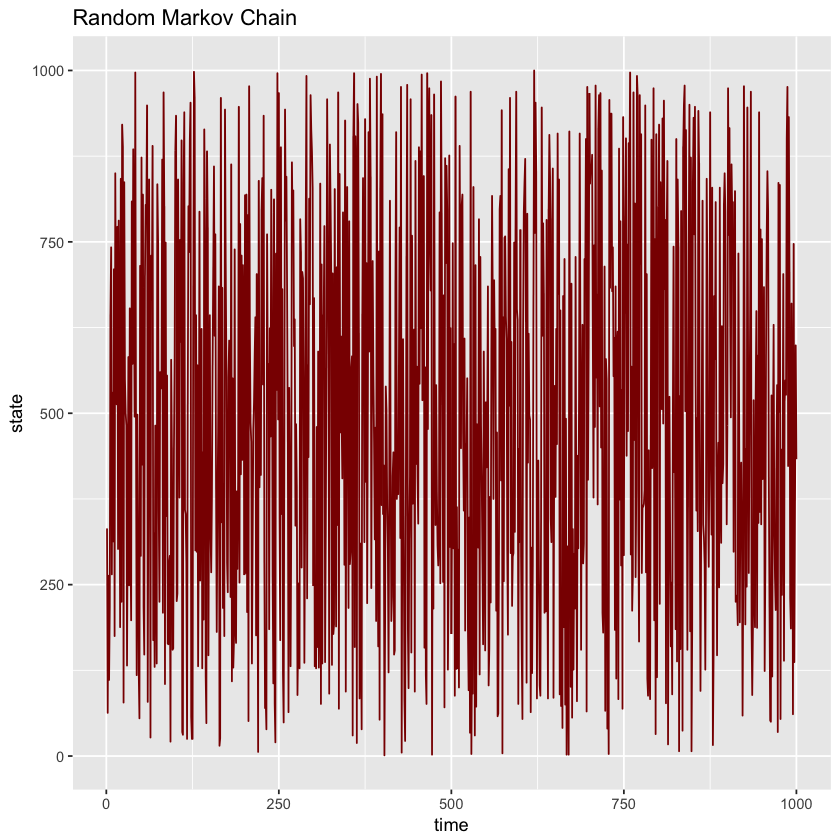

In [22]:
#sample from regMC
regMCts = rmarkovchain(n=1000,object=regMC)
regMCtsDf = as.data.frame(regMCts,stringsAsFactors = FALSE)
#str(regMCtsDf)
regMCtsDf$index <- 1:1000
regMCtsDf$regMCts <- as.numeric(regMCtsDf$regMCts)

library(ggplot2)
p = ggplot(regMCtsDf,aes(index,regMCts))

p + geom_line(colour="dark red") +
xlab("time") +
ylab("state") +
ggtitle("Random Markov Chain")

### 시스템 상태의 분류

* 도달가능, 동치류, 기약 마코브 연쇄

$P_1$ 타입

In [25]:
P1 = matrix(c(.3,0,.7,0,1,0,0.5,0,.5), nrow=3, byrow=TRUE)
print(P1)

P2 = matrix(c(0,1,0,0,0,1,1,0,0), nrow=3, byrow=TRUE)
print(P2)

     [,1] [,2] [,3]
[1,]  0.3    0  0.7
[2,]  0.0    1  0.0
[3,]  0.5    0  0.5
     [,1] [,2] [,3]
[1,]    0    1    0
[2,]    0    0    1
[3,]    1    0    0


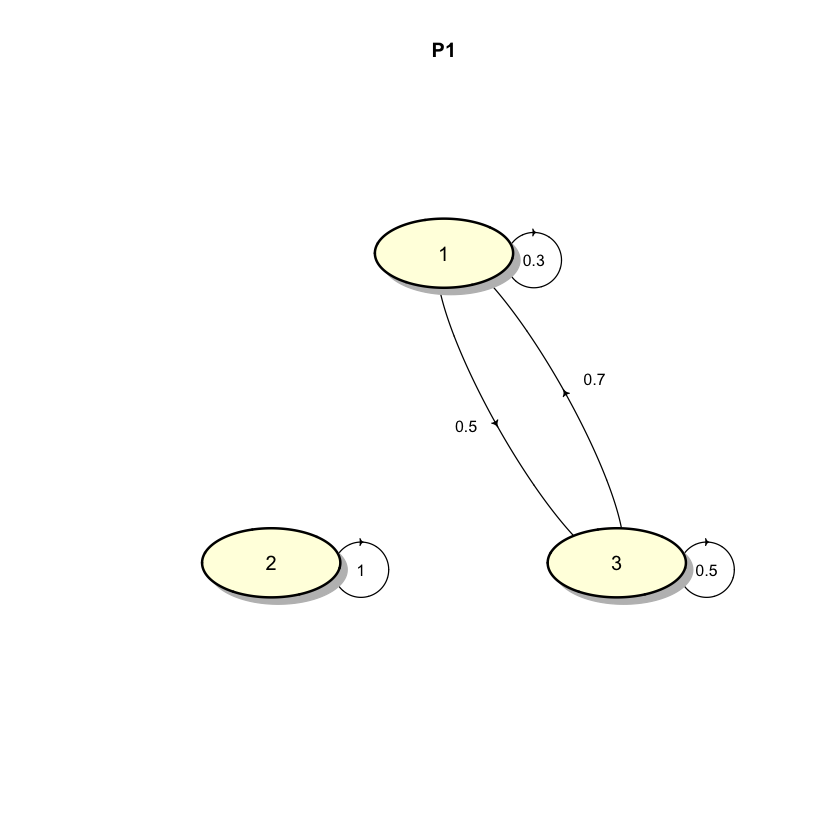

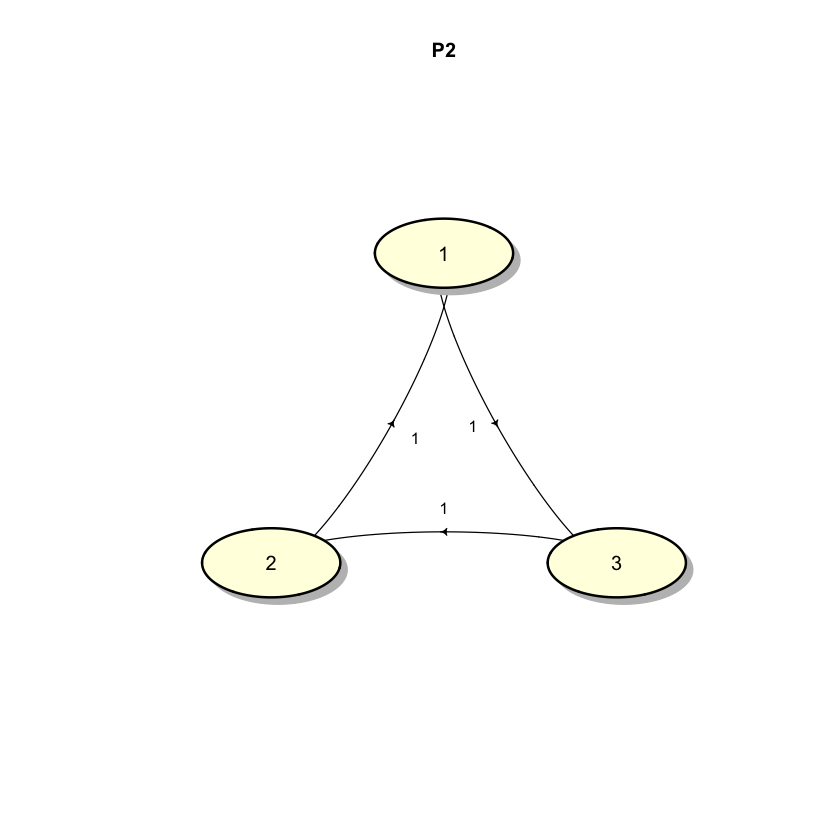

In [26]:
plotmat(P1,pos = c(1,2),
        lwd = 1, box.lwd = 2,
        cex.txt = 0.8,
        box.size = 0.1,
        box.type = "circle",
        box.prop = 0.5,
        box.col = "light yellow",
        arr.length=.1,
        arr.width=.1,
        self.cex = .4,
        self.shifty = -.01,
        self.shiftx = .13,
        main = "P1")

plotmat(P2,pos = c(1,2),
        lwd = 1, box.lwd = 2,
        cex.txt = 0.8,
        box.size = 0.1,
        box.type = "circle",
        box.prop = 0.5,
        box.col = "light yellow",
        arr.length=.1,
        arr.width=.1,
        self.cex = .4,
        self.shifty = -.01,
        self.shiftx = .13,
        main = "P2")

* P1 에서 1 과 3은 서로 도달 가능하나 2는 떨어져 있고, P2 에서는 상태 1,2,3 이 모두 도달 가능하다. 서로 도달 가능한 상태는 같은 성질을 갖기 때문에 이런 상태를 동치류 라고 하고, 동치류로만 이루어진 마코프 체인을 기약 마코브 연쇄라고 합니다.

* 일시상태, 재귀상태, 흡수상태

In [28]:
P3 = matrix(c(.5,.5,0,1), nrow = 2, byrow=TRUE)
print(P3)

     [,1] [,2]
[1,]  0.5  0.5
[2,]  0.0  1.0


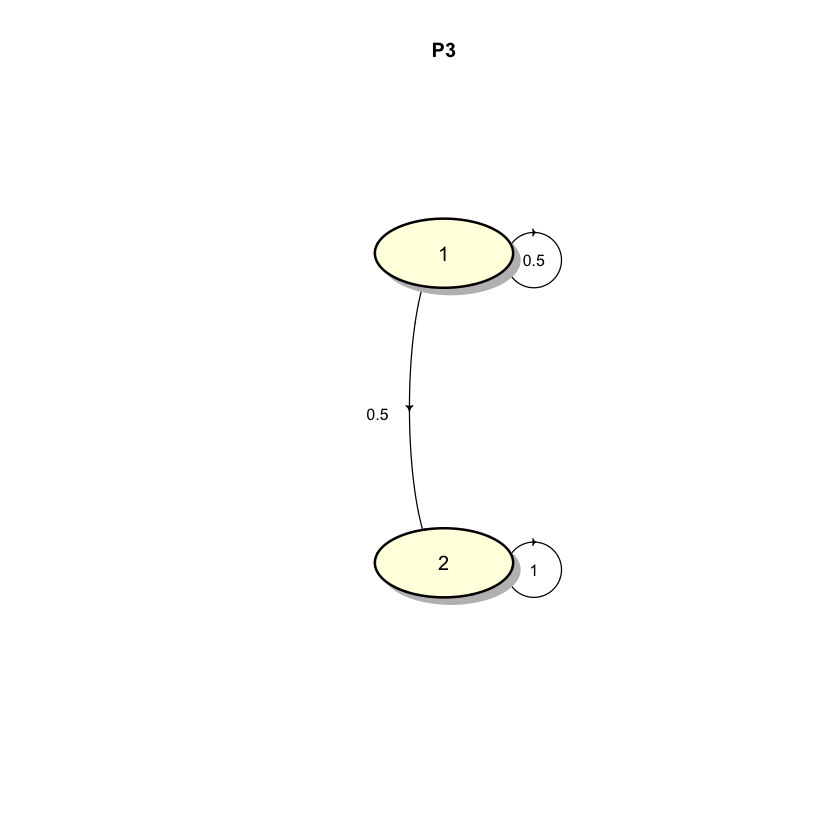

In [34]:
plotmat(t(P3),pos = c(1,1),
        lwd = 1, box.lwd = 2,
        cex.txt = 0.8,
        box.size = 0.1,
        box.type = "circle",
        box.prop = 0.5,
        box.col = "light yellow",
        arr.length=.1,
        arr.width=.1,
        self.cex = .4,
        self.shifty = -.01,
        self.shiftx = .13,
        main = "P3")

* 상태1에서는 상태2로 전이 할 수 있고, 상태 1 에 머물수도 있으나, 상태 2으로 가면 상태 1로 돌아올 방법이 없습니다. 이러상태가 계속되면 결국 상태 2 에 머무르게 됩니다. 
* 이것을 확인 하기 위하여 고유벡터를 구해보면 (0, 1) 이 됩니다.
* 상태 1 과 같이 머무를 확률이 0인 상태를 일시상태(transit state) 라고 하고, 일시상태가 아닌 상태를 재귀상태라고 합니다. 재귀상태 중에서 안정상태 확률이 1인 상태를 즉 시스템이 궁극적으로 머무르게 되는 상태를 흡수상태(Asorbing state) 라고 합니다.


In [37]:
P3eigen = eigen(t(P3))
print(P3eigen)

eigen() decomposition
$values
[1] 1.0 0.5

$vectors
     [,1]       [,2]
[1,]    0  0.7071068
[2,]    1 -0.7071068



In [38]:
p3ev = P3eigen$vectors[,1] / sum(P3eigen$vectors[,1])
round(p3ev, 3)

[1] 0 1

### 흡수상태 분석

분석내용은  
 1. 시스템이 흡수 상태에 도달 하기 까지의 시간
 2. 비흡수 상태에서 흡수상태로 전이할 확률
 3. 특정의 비흡수 상태에 머무르는 시간 이다.
 
흡수 상태 분석을 위해서 시스템 상태가 r 개의 흡수 상태와 s 개의 비 흡수 상태로 이루어져 있는 경우 전이확률행렬을 다음과 같은 형태로 정리 하여야 합니다.


<img src="absorb1.gif" width="500" height="500" align="left">     
  
* 여기서 $\mathbf I$ 는 $r \times r$ 단위 행렬이고, 
* $\mathbf 0$ 은 $r \times s$ 인 0 행렬이다. 
* $\mathbf R$ 은 비 흡수 상태에서 흡수 상태로 전이하는 $s \times r$ 행렬  
* $\mathbf Q$ 는 비 흡수상태간의 전이 행렬로 $s \times s$ 행렬이다.

전이가 무한히 계속되면 결국은 다음과 같이 된다.


<img src="absorb2.gif" width="200" height="200" align="left">     
  
  
  
  
  
처음상태에 관계없이, 비흡수상태의 궁극적인 전이확률은 0 이며, s 개의 비 흡수 상태에서 r 개의 흡수 상태로 전이할 확률은 $(\mathbf I - \mathbf Q)^{-1} \mathbf R$ 의 행렬을 이루게 된다.  여기서 $(\mathbf I - \mathbf Q)^{-1} 은 s 개의 비흡수 상태에서 r 개의 흡수 상태로 들어가기 전까지 각 상태에서 머무르게 되는 평균 소요 시간을 의미한다.


In [44]:
p = c(.5,0,.5)
p
dw = c(1,rep(0,4),p,0,0,0,p,0,0,0,p,rep(0,4),1)
dw
DW = matrix(dw,5,5,byrow=TRUE)
DW

DWmc = new("markovchain",
           transitionMatrix = DW,
           states = c("0","1","2","3","4"),
           name = "Drunkard's Walk"
          )
DWmc

[1] 0.5 0.0 0.5

[1] 1.0 0.0 0.0 0.0 0.0 0.5 0.0 0.5 0.0 0.0 0.0 0.5 0.0 0.5 0.0 0.0 0.0 0.5 0.0
[20] 0.5 0.0 0.0 0.0 0.0 1.0

1.0,0.0,0.0,0.0,0.0
0.5,0.0,0.5,0.0,0.0
0.0,0.5,0.0,0.5,0.0
0.0,0.0,0.5,0.0,0.5
0.0,0.0,0.0,0.0,1.0


Drunkard's Walk 
 A  5 - dimensional discrete Markov Chain defined by the following states: 
 0, 1, 2, 3, 4 
 The transition matrix  (by rows)  is defined as follows: 
    0   1   2   3   4
0 1.0 0.0 0.0 0.0 0.0
1 0.5 0.0 0.5 0.0 0.0
2 0.0 0.5 0.0 0.5 0.0
3 0.0 0.0 0.5 0.0 0.5
4 0.0 0.0 0.0 0.0 1.0


In [45]:
# transit 상태 결정
transientStates(DWmc)

[1] "1" "2" "3"

In [46]:
# absorbing 상태
absorbingStates(DWmc)

[1] "0" "4"

### 또다른 예제

D 백화점 1,000 명 고객의 신용계정 상태가 다음과 같다.

$$
\text{<신용계정 상태>} \\
\begin{array}{c|ccccc}
\hline
\text{상태} & \text{1} & \text{2} & \text{3} & \text{4} & \text{5} \\
\hline
\text{내용} & \text{ 1개월체납 }& \text{ 2개월체납 }& \text{ 3개월체납 } & \text{ 완납 } & \text{ 회수불능 }\\
\text{계정수} & 500 & 300 & 200 & 0 & 0 \\
\hline
\end{array}
$$


고객들의 매월 신용상태는 다음과 같은 전이확률을 갖는 마코브 연쇄모형을 이룬다고 한다.

$
\mathbf P = \begin{pmatrix} 0 & 0.8 & 0 & 0.2 & 0\\ 0 & 0 & 0.7 & 0.3 & 0 \\ 0 & 0 & 0 & 0.5 & 0.5 \\ 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 0 & 1\end{pmatrix}
$

이러한 정보를 기초로 하여 현재의 신용계정 고객중 어느정도 회수불능으로 추정하여야 하는지 분석해 보자.

상태 4(완납), 상태 5(회수불능)은 다른 상태로 전이 할 수 없는 상태이므로 흡수 상태이고, 나머지 3개 상태는 비흡수 상태이다. 전이행렬을 흡수 상태를 위한 형태로 바꾸어 쓰면 다음과 같다.

<img src="absorb3.gif" width="300" height="300" align="left">     



즉 $\mathbf R = \begin{pmatrix} 0.2 & 0 \\ 0.3 & 0 \\ 0.5 & 0.5\end{pmatrix}$, $\mathbf Q = \begin{pmatrix} 0 & 0.8 & 0\\ 0 & 0 & 0.7 \\ 0 & 0 & 0\end{pmatrix}$ 이므로

$\mathbf I - \mathbf Q = \begin{pmatrix} 1 & -0.8 & 0 \\ 0 & 1 & -0.7 \\ 0 & 0 & 1\end{pmatrix}$, $(\mathbf I - \mathbf Q)^{-1} = \begin{pmatrix} 1 & 0.8 & 0.56\\ 0 & 1 & 0.7 \\ 0 & 0 & 1\end{pmatrix}$

$(\mathbf I - \mathbf Q)^{-1} \mathbf R = \begin{pmatrix} 1 & -0.8 & 0.56 \\ 0 & 1 & 0.7 \\ 0 & 0 & 1\end{pmatrix} \begin{pmatrix} 0.2 & 0 \\ 0.3 & 0 \\ 0.5 & 0.5\end{pmatrix} = \begin{pmatrix} 0.72 & 0.28\\ 0.65 & 0.35 \\ 0.5 & 0.5\end{pmatrix}$   
가 된다.

즉 비흡수 상태인 1,2,3 에서 흡수 상태인 4(완납)로 전이할 궁극적인 확률은 (0.72, 0.65, 0.5) 이며, 상태 5(회수불능)로 전이할 확률은 (0.28, 0.35, 0.5) 가 된다.  

따라서 회수불능으로 추정되는 신용계정 수는 (500, 300, 200) (0.28, 0.35, 0.5) = 354 계정, 완납계정 (500, 300, 200)(0.72, 0.65, 0.5) = 655 계정이 된다.  

$(\mathbf I - \mathbf Q)^{-1} \cdot \mathbf I = (2.36, 1.7, 1)$ 이므로 1 개월 체납 계정이 완납 또는 회수 불능으로 결정되기까지 평균소요기간은 2.36개월, 2개월 체납은 1.72 개월로 추정된다.

In [86]:
cc = c(0, 0.8, 0, 0.2, 0, 0, 0, 0.7, 0.3, 0, 0, 0, 0, 0.5, 0.5, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1)
cp = matrix(cc, 5, 5, byrow = TRUE)
print(cp)

     [,1] [,2] [,3] [,4] [,5]
[1,]    0  0.8  0.0  0.2  0.0
[2,]    0  0.0  0.7  0.3  0.0
[3,]    0  0.0  0.0  0.5  0.5
[4,]    0  0.0  0.0  1.0  0.0
[5,]    0  0.0  0.0  0.0  1.0


In [88]:
DWcp = new("markovchain",
           transitionMatrix = cp,
           states = c("1","2","3","4","5"),
           name = "신용상태"
          )
DWcp

신용상태 
 A  5 - dimensional discrete Markov Chain defined by the following states: 
 1, 2, 3, 4, 5 
 The transition matrix  (by rows)  is defined as follows: 
  1   2   3   4   5
1 0 0.8 0.0 0.2 0.0
2 0 0.0 0.7 0.3 0.0
3 0 0.0 0.0 0.5 0.5
4 0 0.0 0.0 1.0 0.0
5 0 0.0 0.0 0.0 1.0


In [89]:
# transit 상태 결정
transientStates(DWcp)

[1] "1" "2" "3"

In [90]:
# absorbing 상태
absorbingStates(DWcp)

[1] "4" "5"

In [109]:
## 이 부분은 다음에 합니다.... Q 부분을 찾아 내는 것입니다.
getRQ = function(M,type="Q"){
    if(length(absorbingStates(M)) == 0) stop("Not Absorbing Matrix")
    tm <- M@transitionMatrix
    d <- diag(tm)
#    m <- max(which(d == 1))
    m <- min(which(d == 1))
    n <- length(d)
    ifelse(type=="Q", A <- tm[(m + 1):n,(m + 1): n], A <- tm[(m+1):n,1:m])
    return(A)
}

Q = getRQ(DWcp)
print(Q)

[1] 1
